MODELO ELEGIDO

Saving MODELO.xlsx to MODELO (1).xlsx
Archivo MODELO (1).xlsx subido correctamente.
Primeras filas del dataset:


,CM,KG,AGE,NFR,GK,DF,MF,AT,EAFC24R,CML,HMVT,SV,DL2324ATR,DL2324M,DL2324PR,EC2324WP,EC2324M,EC2324PR,MVT24
0,195,94,24,43,0,0,0,1,94,30,200.0,1190.0,89.97,2559,7.47,83.84,779,7.21,200.0
1,176,73,24,5,0,0,0,1,94,30,200.0,1230.0,86.94,1875,7.38,83.84,902,7.69,200.0
2,186,75,21,4,0,0,1,0,91,54,180.0,1230.0,86.94,2324,8.05,83.84,964,7.78,180.0
3,182,75,25,2,0,0,0,1,94,54,200.0,850.5,85.81,2159,7.93,83.84,1080,7.71,180.0
4,178,65,23,4,0,0,0,1,90,30,150.0,1150.0,89.97,2937,7.75,83.84,695,7.68,150.0


,HMVT_log,MVT24_log,NFR_log,EC2324M_log,SV_log
0,5.303305,5.303305,3.784190,6.659294,7.082549
1,5.303305,5.303305,1.791759,6.805723,7.115582
2,5.198497,5.198497,1.609438,6.872128,7.115582
3,5.303305,5.198497,1.098612,6.985642,6.747000
4,5.017280,5.017280,1.609438,6.545350,7.048386


Transformación logarítmica aplicada y archivo guardado en: /content/MODELO_transformado.csv

Métricas del modelo Random Forest en la escala original:
R²: 0.8430
RMSE: 6.58 (M€)
MAE: 3.63 (M€)


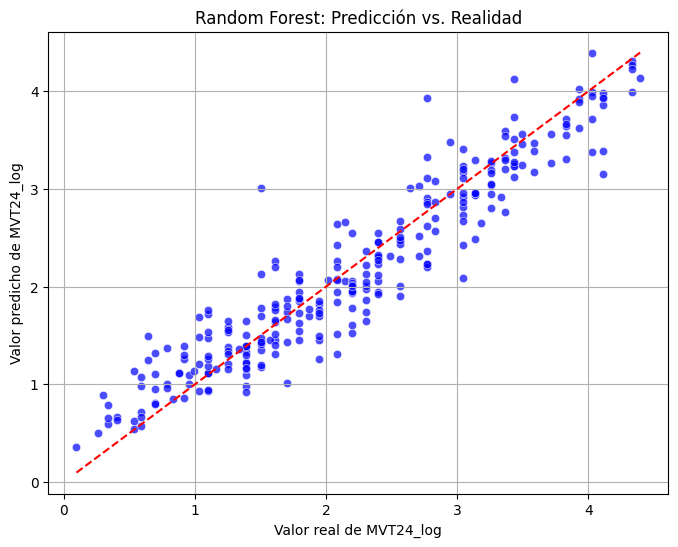

<ipython-input-2-723e46e461ac>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")


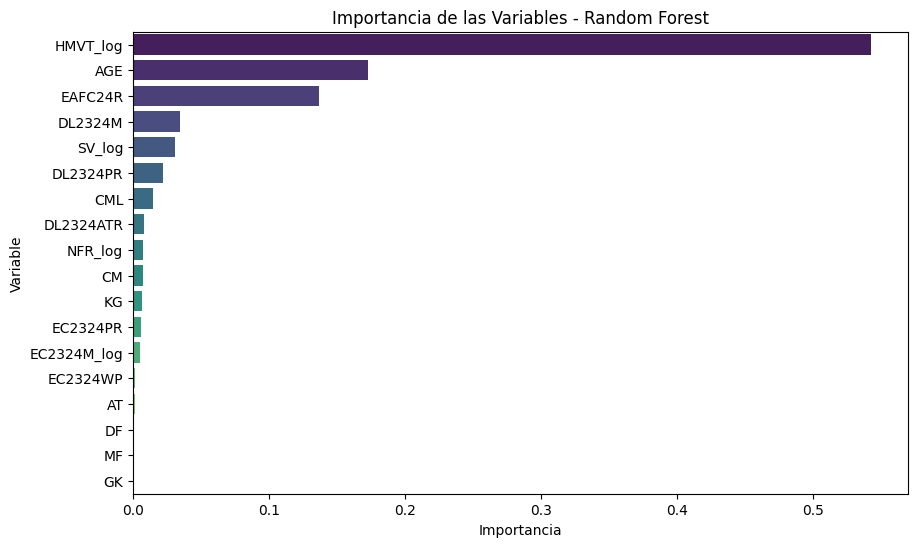

Fitting 3 folds for each of 162 candidates, totalling 486 fits

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Métricas del modelo optimizado en la escala original:
R²: 0.8371
RMSE: 6.71 (M€)
MAE: 3.87 (M€)


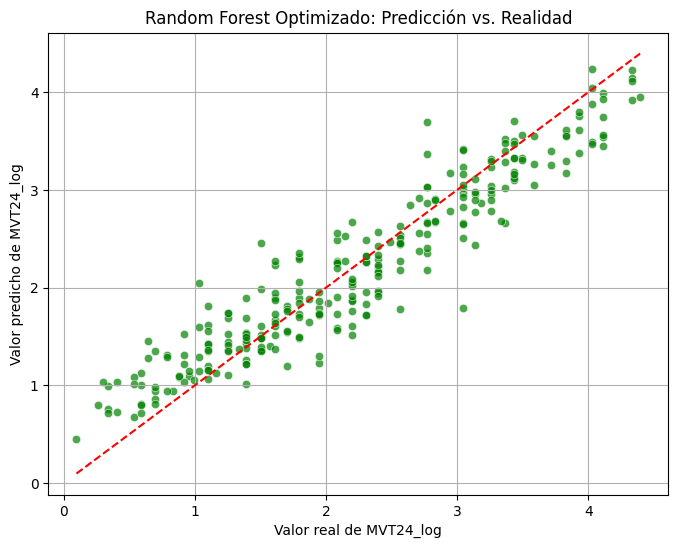

<ipython-input-2-723e46e461ac>:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")


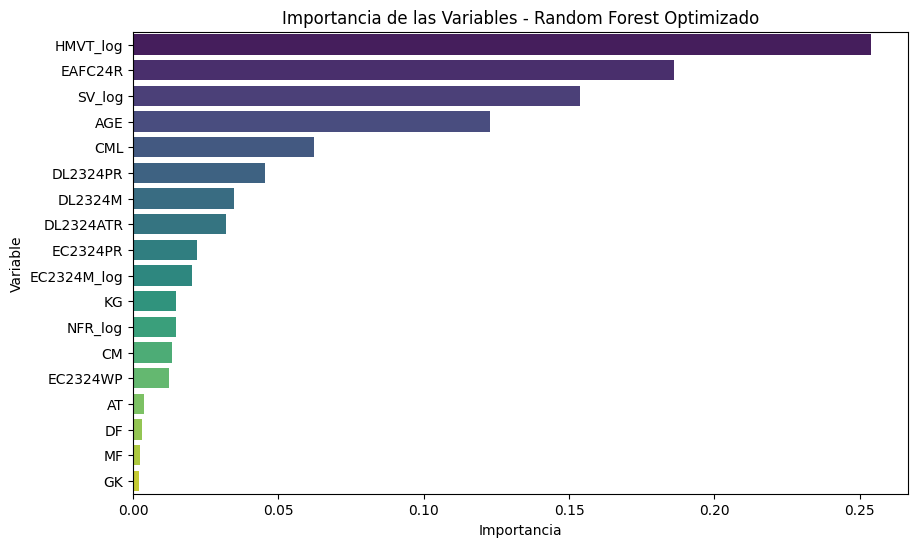

   MVT24_log  MVT24        PRED    DIFF_M€     DIFF_%
0   5.303305  200.0  154.738432  45.261568  22.630784
1   5.303305  200.0  165.613973  34.386027  17.193014
2   5.198497  180.0  160.251534  19.748466  10.971370
3   5.198497  180.0  156.331631  23.668369  13.149094
4   5.017280  150.0  138.961680  11.038320   7.358880


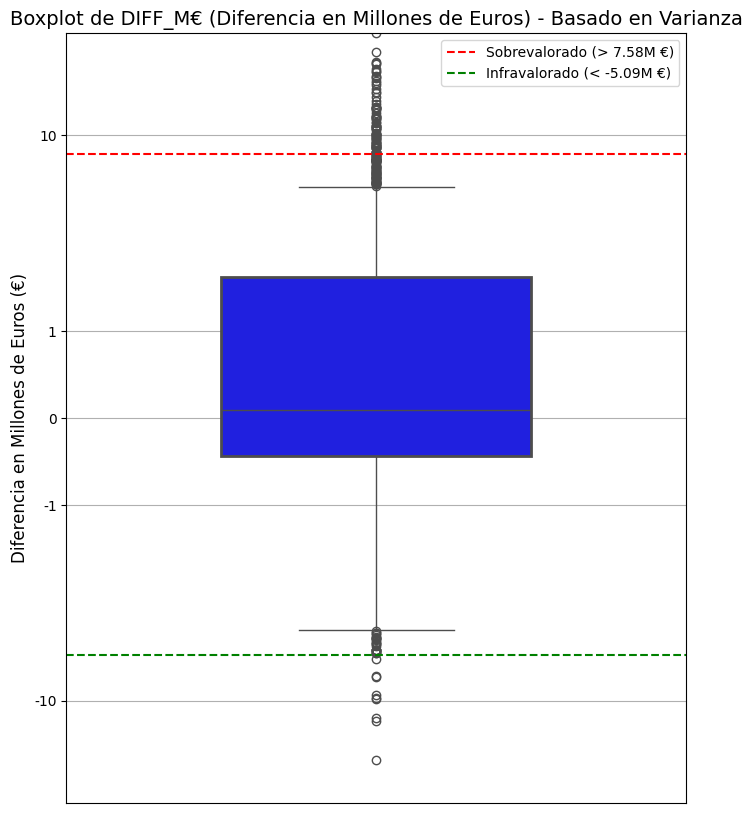

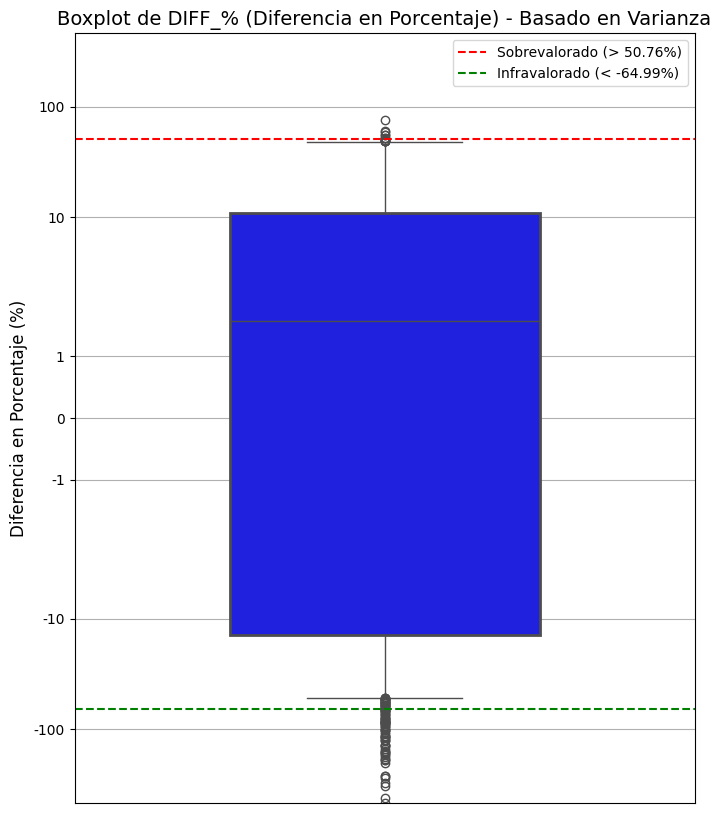


🔹 Introduce las características del jugador:


In [ ]:
# Subir archivo desde Google Colab
from google.colab import files

def upload_file():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    print(f"Archivo {filename} subido correctamente.")
    return filename

# Llamar a la función para subir el archivo
filename = upload_file()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
df = pd.read_excel(filename, sheet_name="Hoja2")  # Ajusta la hoja si es necesario

# Verificar que los datos están cargados correctamente
print("Primeras filas del dataset:")
display(df.head())

import numpy as np

# Lista de variables a transformar
variables_log = ["HMVT", "MVT24", "NFR", "EC2324M", "SV"]

# Aplicar transformación logarítmica y renombrar las columnas
for var in variables_log:
    if var in df.columns:
        df[f"{var}_log"] = np.log1p(df[var])  # log1p(x) = ln(1 + x)
        df.drop(columns=[var], inplace=True)  # Eliminar la variable original
    else:
        print(f"Advertencia: La variable {var} no se encuentra en el dataset.")

# Verificar los cambios en las variables transformadas
display(df[[f"{var}_log" for var in variables_log]].head())

# Guardar la base de datos actualizada en la sesión de Google Colab
file_path = "/content/MODELO_transformado.csv"
df.to_csv(file_path, index=False)

print(f"Transformación logarítmica aplicada y archivo guardado en: {file_path}")

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


# Cargar la base de datos transformada
file_path = "/content/MODELO_transformado.csv"
df = pd.read_csv(file_path)

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["MVT24_log"])  # Eliminar la variable objetivo
y = df["MVT24_log"]

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# **🔹 Evitar valores negativos antes de la retransformación**
y_pred_rf = np.maximum(y_pred_rf, 0)

# **🔹 Retransformar a la escala original (Millones de €)**
y_pred_rf_original = np.exp(y_pred_rf) - 1
y_test_original = np.exp(y_test) - 1

# **🔹 Calcular métricas en la escala original**
r2_rf = r2_score(y_test_original, y_pred_rf_original)
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
mae_rf = mean_absolute_error(y_test_original, y_pred_rf_original)

print("\nMétricas del modelo Random Forest en la escala original:")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:,.2f} (M€)")
print(f"MAE: {mae_rf:,.2f} (M€)")

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valor real de MVT24_log")
plt.ylabel("Valor predicho de MVT24_log")
plt.title("Random Forest: Predicción vs. Realidad")
plt.grid(True)
plt.show()

# Importancia de las variables
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({"Variable": X_train.columns, "Importancia": importances})
feature_importance = feature_importance.sort_values(by="Importancia", ascending=False)

# Mostrar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")
plt.title("Importancia de las Variables - Random Forest")
plt.show()


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir el modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    "n_estimators": [100, 200, 300],       # Número de árboles
    "max_depth": [10, 20, None],           # Profundidad máxima
    "min_samples_split": [2, 5, 10],       # Min muestras para dividir nodo
    "min_samples_leaf": [1, 2, 4],         # Min muestras en cada hoja
    "max_features": ["sqrt", "log2"]       # Cantidad de features usadas por cada árbol
}

# Definir búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=2)

# Ejecutar búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener mejores hiperparámetros
best_params = grid_search.best_params_
print("\nMejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores parámetros encontrados
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test)

# **🔹 Evitar valores negativos antes de la retransformación**
y_pred_best_rf = np.maximum(y_pred_best_rf, 0)

# **🔹 Retransformar a la escala original (Millones de €)**
y_pred_best_rf_original = np.exp(y_pred_best_rf) - 1
y_test_original = np.exp(y_test) - 1

# **🔹 Calcular métricas en la escala original**
r2_best_rf = r2_score(y_test_original, y_pred_best_rf_original)
rmse_best_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_best_rf_original))
mae_best_rf = mean_absolute_error(y_test_original, y_pred_best_rf_original)

print("\nMétricas del modelo optimizado en la escala original:")
print(f"R²: {r2_best_rf:.4f}")
print(f"RMSE: {rmse_best_rf:,.2f} (M€)")
print(f"MAE: {mae_best_rf:,.2f} (M€)")

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valor real de MVT24_log")
plt.ylabel("Valor predicho de MVT24_log")
plt.title("Random Forest Optimizado: Predicción vs. Realidad")
plt.grid(True)
plt.show()

# Importancia de las variables
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({"Variable": X_train.columns, "Importancia": importances})
feature_importance = feature_importance.sort_values(by="Importancia", ascending=False)

# Gráfico de importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")
plt.title("Importancia de las Variables - Random Forest Optimizado")
plt.show()

# 🔹 Crear nueva columna con MVT24 en la escala original sin eliminar MVT24_log
if "MVT24" not in df.columns or df["MVT24"].max() < 20:
    df["MVT24"] = np.exp(df["MVT24_log"]) - 1

# 🔹 Asegurar que usamos las mismas variables que en el entrenamiento
X_all = df[X.columns]  # Solo seleccionamos las columnas que estaban en el entrenamiento

# 🔹 Hacer predicciones asegurando que no incluimos la variable objetivo
df["PRED"] = np.exp(best_rf.predict(X_all)) - 1  # Sustitución de best_xgb por best_rf

# 🔹 Calcular la diferencia absoluta (€) y porcentual (%) con Transfermarkt
df["DIFF_M€"] = df["MVT24"] - df["PRED"]
df["DIFF_%"] = (df["DIFF_M€"] / df["MVT24"]) * 100

# 🔹 Guardar el DataFrame actualizado para futuros análisis
df.to_csv("datos_con_predicciones.csv", index=False)

# 🔹 Mostrar los primeros registros para verificar
print(df[["MVT24_log", "MVT24", "PRED", "DIFF_M€", "DIFF_%"]].head())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Cálculo de umbrales basados en la varianza (desviación estándar)


# Función para calcular los límites usando la media y la desviación estándar
def calcular_umbral_varianza(series, factor=1.5):
    media = np.mean(series)
    std = np.std(series)
    limite_inferior = media - factor * std
    limite_superior = media + factor * std
    return limite_inferior, limite_superior

# Calcular límites para DIFF_M€ y DIFF_% usando varianza
lim_inf_m, lim_sup_m = calcular_umbral_varianza(df["DIFF_M€"])
lim_inf_p, lim_sup_p = calcular_umbral_varianza(df["DIFF_%"])


# Cálculo de límites simétricos en escala logarítmica


def calcular_limites_simetricos(series):
    """
    Define límites simétricos para el eje Y, asegurando que la distancia desde 0 a los valores máximos
    positivos y negativos sea igual. Se usa escala logarítmica simétrica para mejor visualización.
    """
    max_abs = max(abs(series.min()), abs(series.max()))  # Tomamos el valor absoluto más alto
    return -max_abs, max_abs

# Obtener límites simétricos para DIFF_M€ y DIFF_%
ymin_m, ymax_m = calcular_limites_simetricos(df["DIFF_M€"])
ymin_p, ymax_p = calcular_limites_simetricos(df["DIFF_%"])


# Función para configurar etiquetas del eje Y sin transformación logarítmica


def formato_eje_y(ax):
    """
    Modifica las etiquetas del eje Y para que se muestren en escala normal,
    aunque el fondo del gráfico use escala logarítmica simétrica.
    """
    def etiqueta_valor(x, pos):
        return f"{x:.0f}"  # Muestra valores enteros sin formato logarítmico

    ax.yaxis.set_major_formatter(mticker.FuncFormatter(etiqueta_valor))


#  Visualización con Boxplots (Escala Logarítmica pero Etiquetas Normales)


fig, ax = plt.subplots(figsize=(8, 10))
sns.boxplot(y=df["DIFF_M€"], color="blue", width=0.5, boxprops=dict(linewidth=2), ax=ax)

# Líneas de umbral basadas en varianza
ax.axhline(lim_sup_m, color='red', linestyle='--', label=f'Sobrevalorado (> {lim_sup_m:.2f}M €)')
ax.axhline(lim_inf_m, color='green', linestyle='--', label=f'Infravalorado (< {lim_inf_m:.2f}M €)')

# Aplicar escala logarítmica simétrica pero mantener etiquetas normales
ax.set_yscale("symlog")
ax.set_ylim(ymin_m, ymax_m)
formato_eje_y(ax)

ax.set_title("Boxplot de DIFF_M€ (Diferencia en Millones de Euros) - Basado en Varianza", fontsize=14)
ax.set_ylabel("Diferencia en Millones de Euros (€)", fontsize=12)
ax.set_xticks([])  # Ocultar eje X
ax.legend()
ax.grid()
plt.show()


fig, ax = plt.subplots(figsize=(8, 10))
sns.boxplot(y=df["DIFF_%"], color="blue", width=0.5, boxprops=dict(linewidth=2), ax=ax)

# Líneas de umbral basadas en varianza
ax.axhline(lim_sup_p, color='red', linestyle='--', label=f'Sobrevalorado (> {lim_sup_p:.2f}%)')
ax.axhline(lim_inf_p, color='green', linestyle='--', label=f'Infravalorado (< {lim_inf_p:.2f}%)')

# Aplicar escala logarítmica simétrica pero mantener etiquetas normales
ax.set_yscale("symlog")
ax.set_ylim(ymin_p, ymax_p)
formato_eje_y(ax)

ax.set_title("Boxplot de DIFF_% (Diferencia en Porcentaje) - Basado en Varianza", fontsize=14)
ax.set_ylabel("Diferencia en Porcentaje (%)", fontsize=12)
ax.set_xticks([])  # Ocultar eje X
ax.legend()
ax.grid()
plt.show()

import numpy as np
import pandas as pd

# 🔹 Umbrales por varianza (1.5 desviaciones estándar)
def calcular_umbral_varianza(series, factor=1.5):
    media = np.mean(series)
    std = np.std(series)
    limite_inferior = media - factor * std
    limite_superior = media + factor * std
    return limite_inferior, limite_superior

lim_inf_m, lim_sup_m = calcular_umbral_varianza(df["DIFF_M€"])
lim_inf_p, lim_sup_p = calcular_umbral_varianza(df["DIFF_%"])


# Función principal
def evaluar_jugador(datos_entrada, valor_actual, club_grande, en_plantilla):
    for key in ["HMVT_log", "NFR_log", "EC2324M_log", "SV_log"]:
        if key in datos_entrada:
            datos_entrada[key] = np.log(datos_entrada[key] + 1)

    df_input = pd.DataFrame([datos_entrada])
    df_input = df_input.reindex(columns=X_train.columns, fill_value=0)

    valor_predicho = np.exp(best_rf.predict(df_input)[0]) - 1
    diff_millones = valor_actual - valor_predicho
    diff_porcentaje = (diff_millones / valor_actual) * 100

    clasificacion_m = "Sobrevalorado" if diff_millones > lim_sup_m else "Infravalorado" if diff_millones < lim_inf_m else "Correctamente Valorado"
    clasificacion_p = "Sobrevalorado" if diff_porcentaje > lim_sup_p else "Infravalorado" if diff_porcentaje < lim_inf_p else "Correctamente Valorado"

    clasificacion = clasificacion_m if club_grande == 1 else clasificacion_p

    if en_plantilla == 1:
        if clasificacion == "Sobrevalorado":
            recomendacion = "Vender Jugador"
        elif clasificacion == "Infravalorado":
            recomendacion = "Mejorar Condiciones de Contrato y Retener al Jugador"
        else:
            recomendacion = "Mantener Sin Cambios"
    else:
        if clasificacion == "Infravalorado":
            recomendacion = "Fichar Jugador"
        else:
            recomendacion = "Nada"

    # 🔸 Salida condicional según tipo de club
    resultado = {
        "Valor Predicho (M€)": round(valor_predicho, 2),
        "Valor Actual (M€)": round(valor_actual, 2),
        "Clasificación": clasificacion,
        "Recomendación": recomendacion
    }

    if club_grande == 1:
        resultado["Diferencia (M€)"] = round(diff_millones, 2)
    else:
        resultado["Diferencia (%)"] = round(diff_porcentaje, 2)

    return resultado

# =====================================================
# 🔹 Inputs del usuario
# =====================================================
print("\n🔹 Introduce las características del jugador:")

datos_input = {
    "CM": float(input("📏 Altura del jugador (CM): ")),
    "KG": float(input("⚖️ Peso del jugador (KG): ")),
    "AGE": float(input("🎂 Edad del jugador: ")),
    "NFR_log": float(input("🌍 Ranking FIFA de la nacionalidad: ")),
    "GK": int(input("🧤 ¿Es portero? (1: Sí, 0: No): ")),
    "DF": int(input("🛡️ ¿Es defensa? (1: Sí, 0: No): ")),
    "MF": int(input("🎩 ¿Es mediocampista? (1: Sí, 0: No): ")),
    "AT": int(input("⚽ ¿Es delantero? (1: Sí, 0: No): ")),
    "EAFC24R": float(input("🎮 Valoración Potencial en EAFC24: ")),
    "CML": float(input("📅 Meses restantes de contrato: ")),
    "SV_log": float(input("🏟️ Valor de plantilla (M€): ")),
    "DL2324ATR": float(input("🏆 Nivel de competitividad de la liga doméstica: ")),
    "DL2324M": float(input("⏳ Minutos jugados en liga: ")),
    "DL2324PR": float(input("📊 Rendimiento en liga: ")),
    "EC2324WP": float(input("💰 Premio por competiciones europeas (M€): ")),
    "EC2324PR": float(input("🎖️ Rendimiento en competiciones europeas: ")),
    "EC2324M_log": float(input("⏳ Minutos jugados en competiciones europeas: ")),
    "HMVT_log": float(input("📈 Valor de mercado más alto en su carrera (M€): ")),
}

valor_actual = float(input("💶 Valor actual del jugador en M€: "))
club_grande = int(input("🏟️ Tipo de club (1: Grande / 0: Modesto): "))
en_plantilla = int(input("👕 ¿Está en tu plantilla? (1: Sí / 0: No): "))

# Evaluar jugador
evaluacion = evaluar_jugador(datos_input, valor_actual, club_grande, en_plantilla)

# Mostrar resultado
print("\n📊 RESULTADOS DE LA EVALUACIÓN DEL JUGADOR")
for clave, valor in evaluacion.items():
    print(f"{clave}: {valor}")


API

In [ ]:
!pip install fastapi uvicorn nest_asyncio pyngrok joblib -q

import nest_asyncio
from pyngrok import ngrok
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import numpy as np
import joblib

# Guardar el modelo entrenado
joblib.dump(best_rf, "modelo_rf.pkl")

# Guardar columnas del modelo para asegurar orden correcto
joblib.dump(X_train.columns.tolist(), "columnas_modelo.pkl")

# Guardar umbrales para clasificación
umbrales = {
    "lim_inf_m": lim_inf_m,
    "lim_sup_m": lim_sup_m,
    "lim_inf_p": lim_inf_p,
    "lim_sup_p": lim_sup_p
}
joblib.dump(umbrales, "umbrales.pkl")

print("Modelo, columnas y umbrales guardados.")


# Habilitar entorno asíncrono (Colab necesita esto)
nest_asyncio.apply()

# Cargar modelo y configuraciones guardadas anteriormente
modelo = joblib.load("modelo_rf.pkl")
columnas = joblib.load("columnas_modelo.pkl")
umbrales = joblib.load("umbrales.pkl")  # Un solo diccionario con los 4 umbrales

# Inicializar FastAPI
app = FastAPI(title="API de Predicción de Valor de Mercado")

# Estructura de entrada del jugador
class JugadorInput(BaseModel):
    CM: float
    KG: float
    AGE: float
    NFR_log: float
    GK: int
    DF: int
    MF: int
    AT: int
    EAFC24R: float
    CML: float
    SV_log: float
    DL2324ATR: float
    DL2324M: float
    DL2324PR: float
    EC2324WP: float
    EC2324PR: float
    EC2324M_log: float
    HMVT_log: float
    valor_actual: float
    club_grande: int
    en_plantilla: int

@app.post("/predict")
def predecir_valor(jugador: JugadorInput):
    datos_dict = jugador.dict()
    valor_actual = datos_dict.pop("valor_actual")
    club_grande = datos_dict.pop("club_grande")
    en_plantilla = datos_dict.pop("en_plantilla")

    df_input = pd.DataFrame([datos_dict]).reindex(columns=columnas, fill_value=0)
    pred_log = modelo.predict(df_input)[0]
    valor_predicho = np.exp(pred_log) - 1
    diff_m = valor_actual - valor_predicho
    diff_p = (diff_m / valor_actual) * 100

    lim_inf_m, lim_sup_m = umbrales["lim_inf_m"], umbrales["lim_sup_m"]
    lim_inf_p, lim_sup_p = umbrales["lim_inf_p"], umbrales["lim_sup_p"]

    clasif_m = "Sobrevalorado" if diff_m > lim_sup_m else "Infravalorado" if diff_m < lim_inf_m else "Correctamente Valorado"
    clasif_p = "Sobrevalorado" if diff_p > lim_sup_p else "Infravalorado" if diff_p < lim_inf_p else "Correctamente Valorado"
    clasif = clasif_m if club_grande == 1 else clasif_p

    if en_plantilla == 1:
        if clasif == "Sobrevalorado":
            recomendacion = "Vender Jugador"
        elif clasif == "Infravalorado":
            recomendacion = "Mejorar Condiciones de Contrato y Retener al Jugador"
        else:
            recomendacion = "Mantener Sin Cambios"
    else:
        if clasif == "Infravalorado":
            recomendacion = "Fichar Jugador"
        else:
            recomendacion = "Nada"

    resultado = {
        "Valor Predicho (M€)": round(valor_predicho, 2),
        "Valor Actual (M€)": round(valor_actual, 2),
        "Clasificación": clasif,
        "Recomendación": recomendacion
    }
    if club_grande == 1:
        resultado["Diferencia (M€)"] = round(diff_m, 2)
    else:
        resultado["Diferencia (%)"] = round(diff_p, 2)

    return resultado

# Añade tu token si aún no lo has hecho en esta cuenta de Colab
!ngrok config add-authtoken 2vtr0V6SLyV5WRW7KakJ4kxnlag_38zxWGb4sXRf3dNNNRor  # Solo una vez por cuenta

# Lanzar la API en ngrok
public_url = ngrok.connect(8000)
print("✅ Tu API está disponible en:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)


Modelo, columnas y umbrales guardados.
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


INFO:     Started server process [242]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


✅ Tu API está disponible en: NgrokTunnel: "https://b4a2-34-125-171-140.ngrok-free.app" -> "http://localhost:8000"


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [242]


In [ ]:
%%writefile main.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import pandas as pd

# Cargar archivos
modelo = joblib.load("modelo_rf.pkl")
columnas = joblib.load("columnas_modelo.pkl")
umbrales = joblib.load("umbrales.pkl")

app = FastAPI(title="API de Predicción de Valor de Mercado")

class JugadorInput(BaseModel):
    CM: float
    KG: float
    AGE: float
    NFR_log: float
    GK: int
    DF: int
    MF: int
    AT: int
    EAFC24R: float
    CML: float
    SV_log: float
    DL2324ATR: float
    DL2324M: float
    DL2324PR: float
    EC2324WP: float
    EC2324PR: float
    EC2324M_log: float
    HMVT_log: float
    valor_actual: float
    club_grande: int
    en_plantilla: int

@app.post("/predict")
def predecir_valor(jugador: JugadorInput):
    datos = jugador.dict()
    valor_actual = datos.pop("valor_actual")
    club_grande = datos.pop("club_grande")
    en_plantilla = datos.pop("en_plantilla")

    df_input = pd.DataFrame([datos]).reindex(columns=columnas, fill_value=0)
    pred_log = modelo.predict(df_input)[0]
    valor_predicho = np.exp(pred_log) - 1
    diff_m = valor_actual - valor_predicho
    diff_p = (diff_m / valor_actual) * 100

    lim_inf_m, lim_sup_m = umbrales["lim_inf_m"], umbrales["lim_sup_m"]
    lim_inf_p, lim_sup_p = umbrales["lim_inf_p"], umbrales["lim_sup_p"]

    clasif_m = "Sobrevalorado" if diff_m > lim_sup_m else "Infravalorado" if diff_m < lim_inf_m else "Correctamente Valorado"
    clasif_p = "Sobrevalorado" if diff_p > lim_sup_p else "Infravalorado" if diff_p < lim_inf_p else "Correctamente Valorado"
    clasif = clasif_m if club_grande == 1 else clasif_p

    if en_plantilla == 1:
        recomendacion = "Vender Jugador" if clasif == "Sobrevalorado" else "Mejorar Condiciones de Contrato y Retener al Jugador" if clasif == "Infravalorado" else "Mantener Sin Cambios"
    else:
        recomendacion = "Fichar Jugador" if clasif == "Infravalorado" else "Nada"

    resultado = {
        "Valor Predicho (M€)": round(valor_predicho, 2),
        "Valor Actual (M€)": round(valor_actual, 2),
        "Clasificación": clasif,
        "Recomendación": recomendacion
    }

    if club_grande == 1:
        resultado["Diferencia (M€)"] = round(diff_m, 2)
    else:
        resultado["Diferencia (%)"] = round(diff_p, 2)

    return resultado


Writing main.py


In [ ]:
%%writefile requirements.txt
fastapi
uvicorn
joblib
pandas
numpy
scikit-learn


Writing requirements.txt


In [ ]:
from google.colab import files
files.download("main.py")
files.download("requirements.txt")
files.download("modelo_rf.pkl")
files.download("columnas_modelo.pkl")
files.download("umbrales.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>